## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data and EDA

In [2]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
print(amazon_ratings.isnull().sum()) #check for missing value

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64


In [4]:
column_list = amazon_ratings.columns

for col in column_list:
    # unique_value = amazon_ratings[col].unique()
    unique_count = amazon_ratings[col].nunique()
    print(f"The number of unique values in column '{col}': {unique_count}")

The number of unique values in column 'UserId': 1210271
The number of unique values in column 'ProductId': 249274
The number of unique values in column 'Rating': 5
The number of unique values in column 'Timestamp': 4231


We have 5-scale rating. From naively looking at the number of each data, we can say that a single product can be bought from multiple users.

### User data analysis

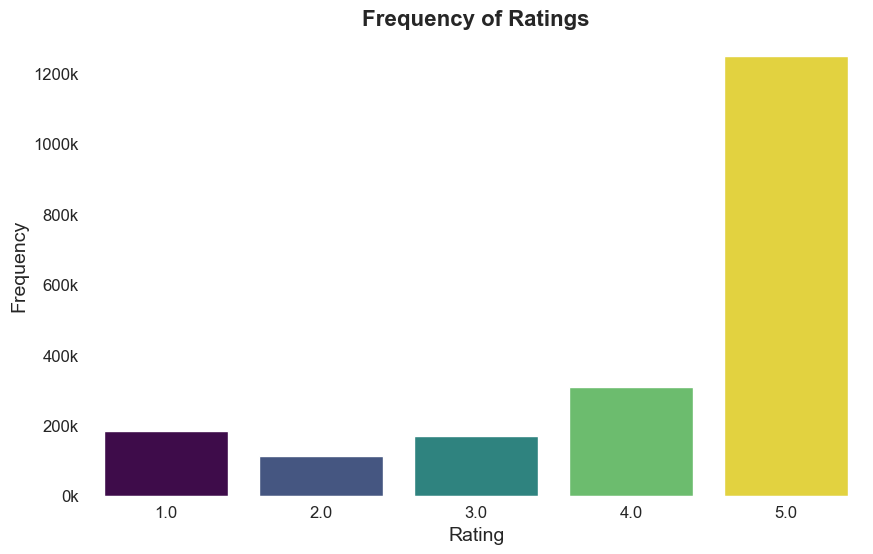

In [5]:
# Calculate the frequency of ratings
rating_counts = amazon_ratings['Rating'].value_counts().sort_index()

# Create a DataFrame from the rating counts
rating_df = rating_counts.reset_index()
rating_df.columns = ['Rating', 'Frequency']

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_df, x='Rating', y='Frequency', hue='Rating', dodge=False, palette='viridis', legend=False)

# Customize the chart layout and style
plt.title('Frequency of Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set background to be transparent
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

# plt.gca().yaxis.get_major_formatter().set_scientific(False)

# Adjust y-axis to display numbers in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))


# Display the chart
plt.show()

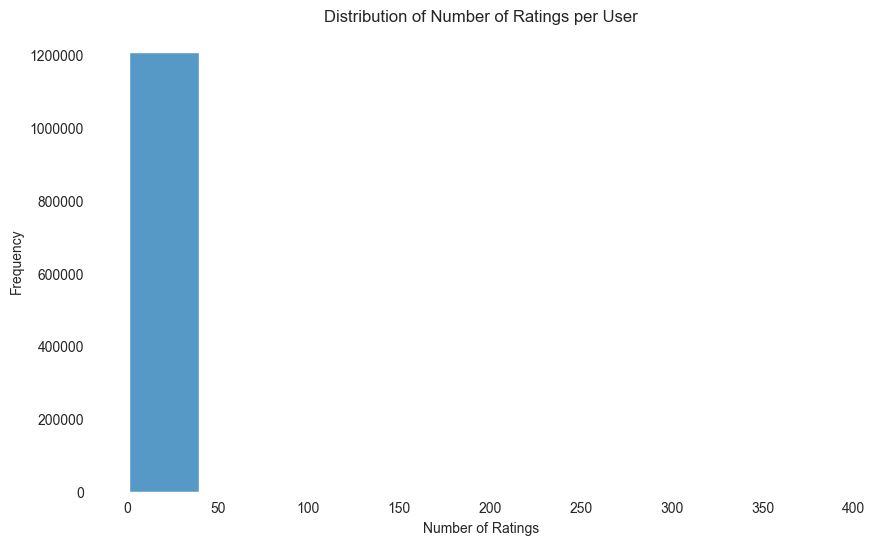

In [6]:
# Count of rating per user
user_rating_count = amazon_ratings.groupby('UserId')['Rating'].count()

plt.figure(figsize=(10, 6))
sns.histplot(user_rating_count, bins=10)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')

# Set background to be transparent
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

# Adjust y-axis to display numbers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))


plt.show()



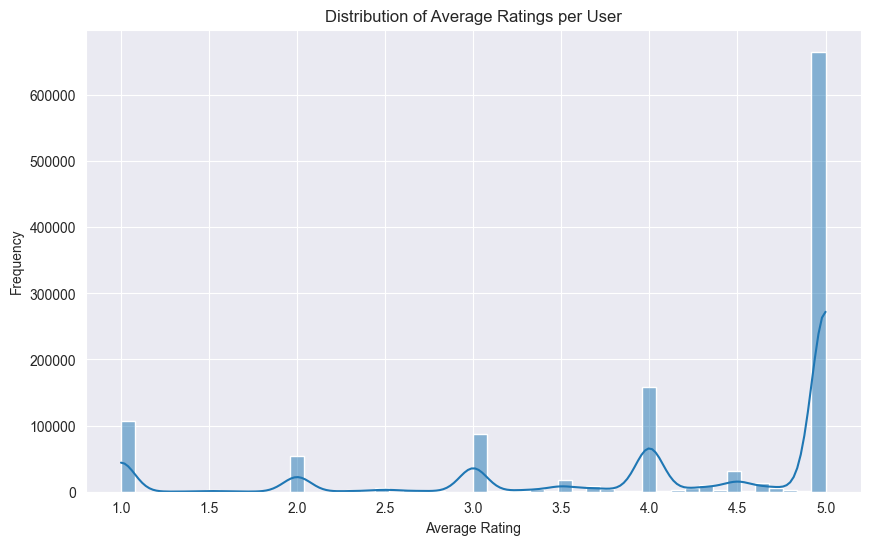

In [7]:
# average rating per user
user_avg_rating = amazon_ratings.groupby('UserId')['Rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(user_avg_rating, bins=50, kde=True)
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

**Data Skewness**: The high frequency of 5.0 ratings indicates data skewness, suggesting that users may not be providing thoughtful reviews.   
**Few Active Users**: Most ratings come from a few users, indicating that the data is dominated by a small number of users.   
**Rating Reliability**: The skewed data necessitates caution in recommendation system design, and additional measures may be required to ensure rating reliability.

### Product data analysis

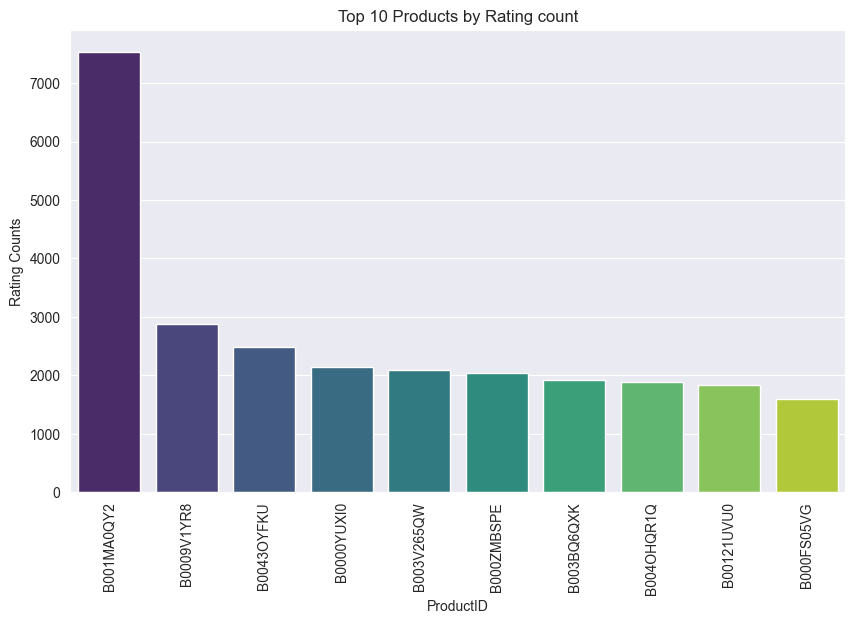

In [8]:
# Average ratings per product ID
product_rating_count = amazon_ratings.groupby('ProductId')['Rating'].count().sort_values(ascending=False)

top_10_products = product_rating_count.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, hue =top_10_products.index, palette='viridis', legend=False)
plt.title('Top 10 Products by Rating count')
plt.xlabel('ProductID')
plt.ylabel('Rating Counts')
plt.xticks(rotation=90)
plt.show()

In [9]:
avg_rating_per_product = amazon_ratings.groupby('ProductId')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_per_product)

ProductId
B00LPVG6V0    5.0
1304146537    5.0
B00LU0LTOU    5.0
0205616461    5.0
130414674X    5.0
             ... 
B001THZVBG    1.0
B001THQUPM    1.0
B00DQDZNE6    1.0
B00DQEBK06    1.0
957696718X    1.0
Name: Rating, Length: 249274, dtype: float64


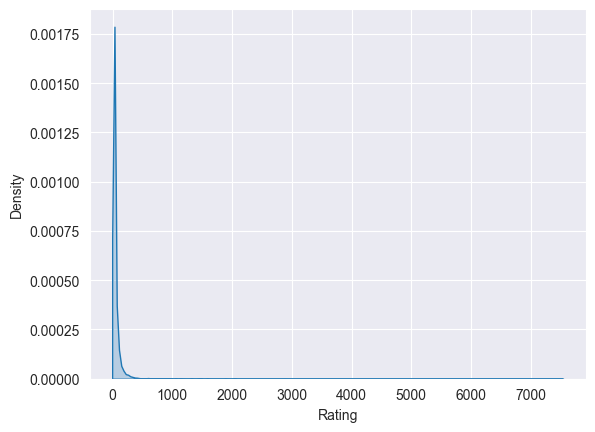

In [10]:
# Number of ratings per product KDE distribution
sns.kdeplot(product_rating_count, fill=True, cmap='viridis')
plt.show()

**Skewed Ratings Distribution**: One particular product has an exceptionally high number of ratings, with its count being more than twice that of the second most-rated product. This indicates that the rating data is skewed toward specific products. The KDE plot shows that the number of ratings is also skewed, meaning that most of the rating data in this dataset comes from a few products.   
**Rating Score vs. Review Count**: The product with the most reviews does not necessarily have the highest average rating.  

## Todo in my opinion

1. how to handle imbalance of data 
2. decide which models to try: Collaborative Filtering, Content-Based Filtering, etc